**Business Problem**


The aim here is to understand Which variables are significant in predicting the demand for shared electric cycles in the Indian market.
And how well those variables describe the electric cycle demands.

**Dataset:**

The dataset has the following features:

**datetime:** datetime

**season:** season (1: spring, 2: summer, 3: fall, 4: winter)

**holiday:** whether day is a holiday or not

**workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.

**weather:**
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp:** temperature in Celsius

**atemp:** feeling temperature in Celsius

**humidity:** humidity

**windspeed:** wind speed

**casual:** count of casual users

**registered:** count of registered users

**count:** count of total rental bikes including both casual and registered

In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import levene
from scipy.stats import shapiro

In [2]:
# reading the Dataset
import pandas as pd
df=pd.read_csv("bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**SHAPE OF DATA**

In [3]:
# Analysing the Shape of our Dataset
print(df.shape)
print(df.columns)

(10886, 12)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


The Dataset Contains 10886 Rows and 12 Columns.
The Columns of the dataset are as follows:
datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered and count.

In [5]:
#Understanding the Data Types of the Attributes
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

The Data Types of the Attributes are object, integer (int64), float (float64)

In [6]:
#Converting the required attributes to categorical one:
for col in ['weather','season','workingday','holiday']:
  df[col]=df[col].astype('category')
df['datetime']=pd.to_datetime(df['datetime'])
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

The datetime attribute was made to datetime64 data type, so we can access different attributes of datetime such as year, month, time, etc, directly from the datetime attribute. weather, season, workingday, holiday attributes were made to categorical datatype as numbering were given to different categorical variables in each attribute.

In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There is no Null Values present in the dataset.

In [8]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Each Column have been Statistically summarized in terms of number of occurences, number of unique values, most occuring element and its frequency, etc. There are 4 unique values in season, 2 in holiday, 2 in workingday and 4 in weather. The mean temperature in the datset is 20.23 degree celsius, mean humidity is 61.88 and mean windspeed is 12.8.

**Non-Graphical Analysis**

In [9]:
# Undertaking basic Non-Graphical Analysis
# Attempting to understand the number of rows of data available for each Years
df['datetime'].dt.year.value_counts()

datetime
2012    5464
2011    5422
Name: count, dtype: int64

Out of 10886 rows, 5464 rows of data are from 2012 and 5422 rows of data are from 2011.

In [10]:
# Attempting to understand the distribution of data w.r.t seasons
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

The data is distributed more are less uniform throughout all seasons.

In [11]:
# Attempting to understand the distribution of registered and casual users w.r.t the years
print(df.groupby(df['datetime'].dt.year)['registered'].sum())
print(df.groupby(df['datetime'].dt.year)['casual'].sum())

datetime
2011     626162
2012    1067179
Name: registered, dtype: int64
datetime
2011    155817
2012    236318
Name: casual, dtype: int64


2012 Year had more casual and registered users compared to 2011.

In [12]:
# Attempting to understand the distribution of registered and casual users w.r.t the seasons
print(df.groupby('season')['registered'].sum())
print(df.groupby('season')['casual'].sum())

season
1    270893
2    458610
3    497944
4    465894
Name: registered, dtype: int64
season
1     41605
2    129672
3    142718
4     78140
Name: casual, dtype: int64


Season 3 (Fall) had the most number of Registered and Casual users compared to other seasons and Season 1 (Spring) had the least number of Registered and Casual users.

In [13]:
# Attempting to understand the distribution of total users w.r.t the weather
print(df.groupby('weather')['count'].sum())

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64


Weather 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) had least number of users and Weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) had the most number of users.

**VISUAL ANALYSIS**

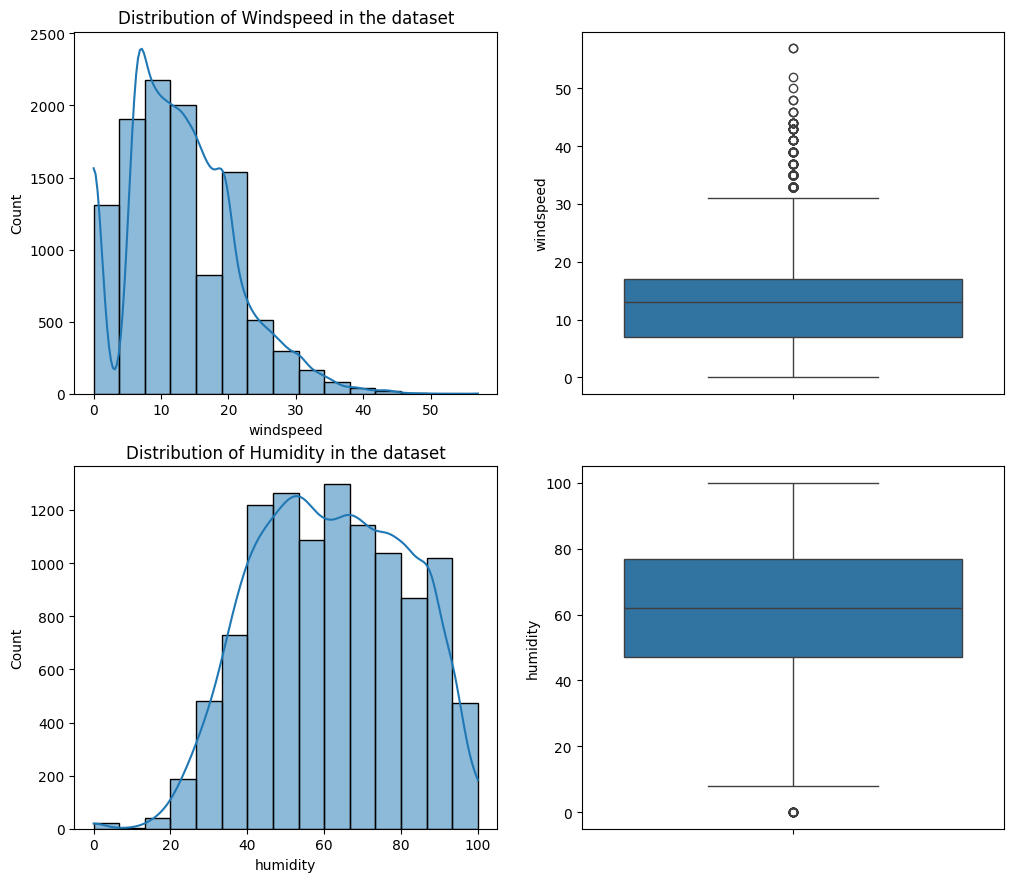

In [15]:
#Attempting to Understand the Distribution of Windspeed and Humidity in the dataset
plt.figure(figsize=(12,16))
plt.subplot(3,2,1)
plt.title("Distribution of Windspeed in the dataset")
sns.histplot(df['windspeed'],bins=15,kde=True)
plt.subplot(3,2,2)
sns.boxplot(df['windspeed'])
plt.subplot(3,2,3)
plt.title("Distribution of Humidity in the dataset")
sns.histplot(df['humidity'],bins=15,kde=True)
plt.subplot(3,2,4)
sns.boxplot(df['humidity'])
plt.show()

The median of Windspeed is 13 and the median of Humidity is 62

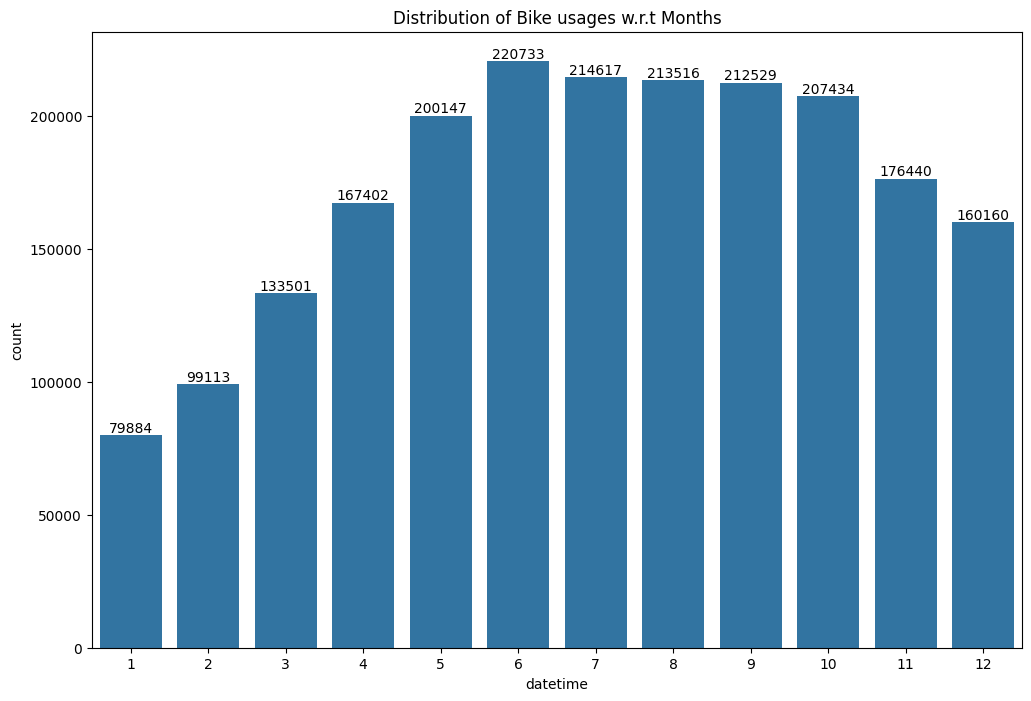

In [18]:
#Attempting to Understand the bike usage w.r.t months
plt.figure(figsize=(12,8))
dfw=df.groupby(df['datetime'].dt.month)['count'].sum()
plt.title("Distribution of Bike usages w.r.t Months")
ax=sns.barplot(data=dfw)
ax.bar_label(ax.containers[0])
plt.show()

From the figure we can understand that least usage of bikes are seen in the month if January and most usage is seen in the month of June.

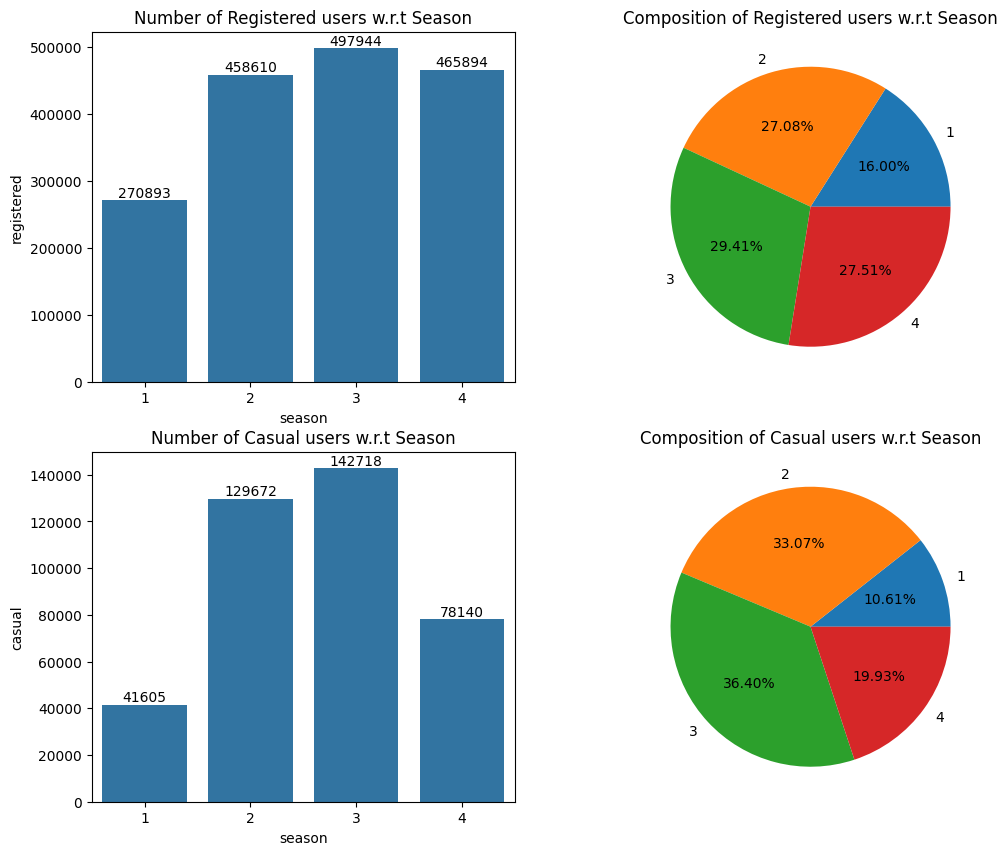

In [20]:
# Attempting to understand the distribution of registered and casual users w.r.t the seasons
# Given, Season (1: spring, 2: summer, 3: fall, 4: winter)
s1=df.groupby('season')['registered'].sum()
s2=df.groupby('season')['casual'].sum()
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title("Number of Registered users w.r.t Season")
ax=sns.barplot(s1)
ax.bar_label(ax.containers[0])
plt.subplot(2,2,2)
plt.title("Composition of Registered users w.r.t Season")
plt.pie(s1,labels=s1.index,autopct="%.2f%%")
plt.subplot(2,2,3)
plt.title("Number of Casual users w.r.t Season")
ax=sns.barplot(s2)
ax.bar_label(ax.containers[0])
plt.subplot(2,2,4)
plt.title("Composition of Casual users w.r.t Season")
plt.pie(s2,labels=s2.index,autopct="%.2f%%")
plt.show()

There are more Registered and Casual users in Fall season and least users in Spring season. Casusal users tend to use the bikes more on Summer and Fall season and least on Spring. Registered users use the bikes more on Summer,Fall and Winter Season and least on Spring.

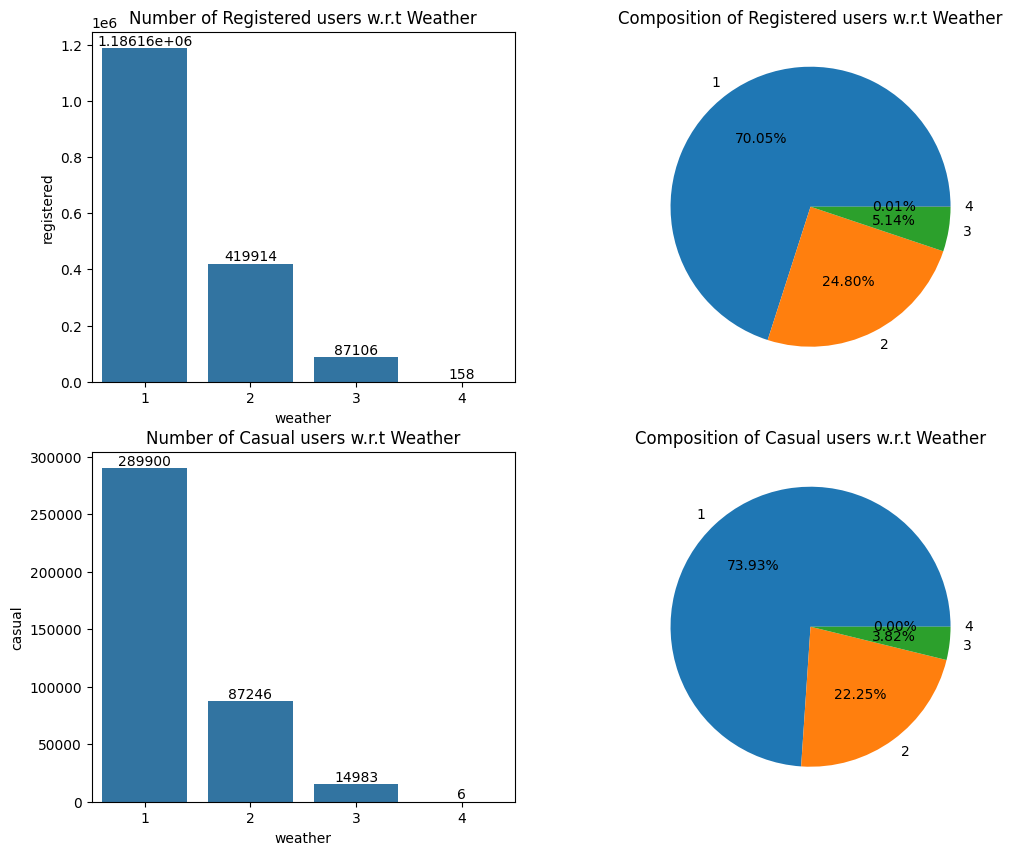

In [21]:
# Attempting to understand the distribution of registered and casual users w.r.t the weather
# Given, 1: Clear, Few clouds, partly cloudy, partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
w1=df.groupby('weather')['registered'].sum()
w2=df.groupby('weather')['casual'].sum()
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title("Number of Registered users w.r.t Weather")
ax=sns.barplot(w1)
ax.bar_label(ax.containers[0])
plt.subplot(2,2,2)
plt.title("Composition of Registered users w.r.t Weather")
plt.pie(w1,labels=s1.index,autopct="%.2f%%")
plt.subplot(2,2,3)
plt.title("Number of Casual users w.r.t Weather")
ax=sns.barplot(w2)
ax.bar_label(ax.containers[0])
plt.subplot(2,2,4)
plt.title("Composition of Casual users w.r.t Weather")
plt.pie(w2,labels=s2.index,autopct="%.2f%%")
plt.show()

There is near zero usage of bikes in Weather 4 ( Heavy Rain with Ice Pallets,  Thunderstorm and Mist, Snow and Fog ) and most usage of bikes in Weather 1 ( Clear, Few clouds, partly cloudy, partly cloudy ), Registered customers relatively higher usage on weather 2 ( Mist and Cloudy, Mist and Broken clouds, Mist and Few clouds, Mist ), 3 ( Light Snow, Light Rain with Thunderstorm and Scattered clouds, Light Rain and Scattered cloud )

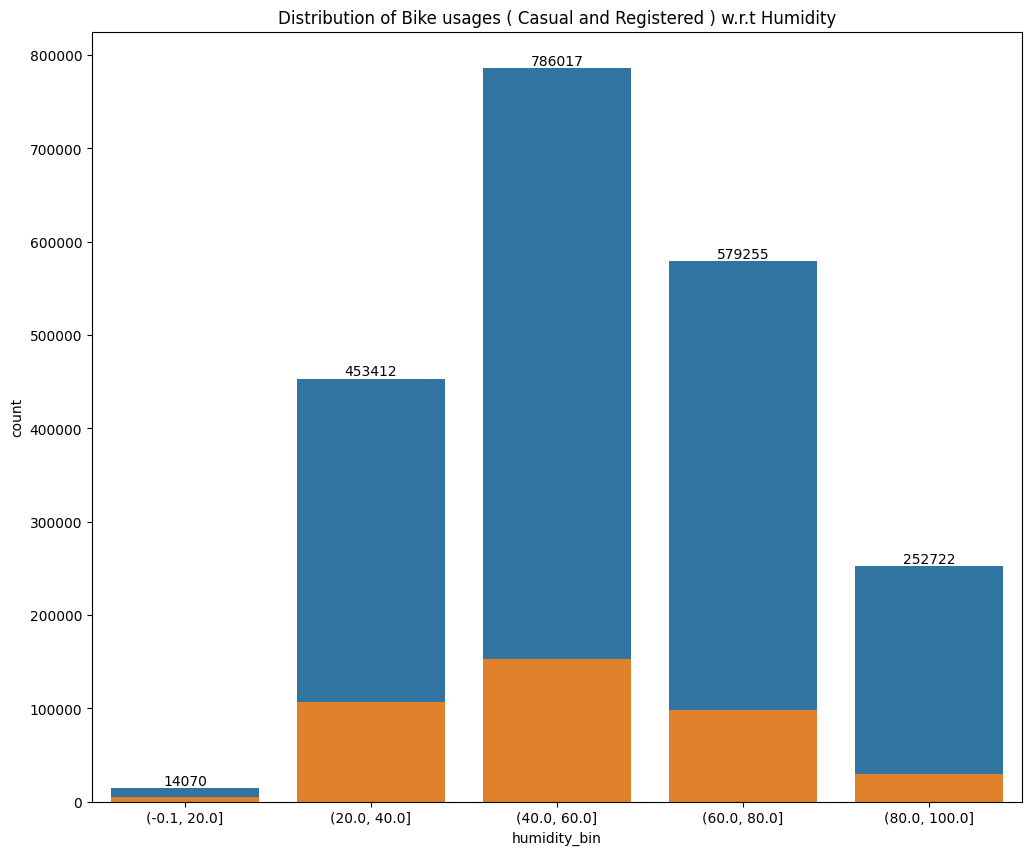

In [25]:
# Attempting to understand the distribution of bike usages w.r.t humidity
plt.figure(figsize=(12,10))
pts=5
df['humidity_bin']=pd.cut(df['humidity'],bins=pts)
plt.title("Distribution of Bike usages ( Casual and Registered ) w.r.t Humidity")
ax=sns.barplot(df.groupby('humidity_bin')['count'].sum())
ax.bar_label(ax.containers[0])
sns.barplot(df.groupby('humidity_bin')['casual'].sum())
plt.show()

Most bike usages are seen when the humidity is in range of 40 to 60, followed by humidity range 60 to 80.

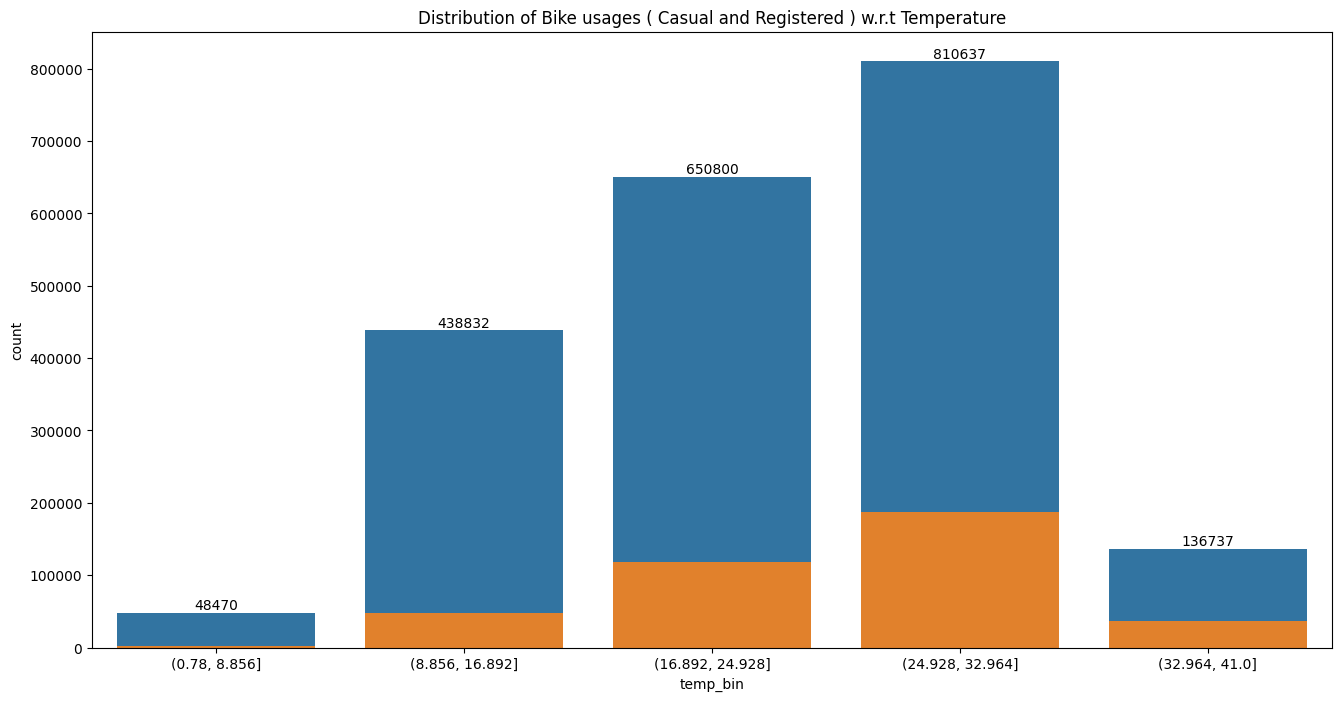

In [28]:
# Attempting to understand the distribution of bike usages w.r.t temperature
plt.figure(figsize=(16,8))
df['temp_bin']=pd.cut(df['temp'],bins=pts)
plt.title("Distribution of Bike usages ( Casual and Registered ) w.r.t Temperature")
ax=sns.barplot(data=df.groupby(['temp_bin'])[['count','casual','registered']].sum(),x='temp_bin',y='count')
ax.bar_label(ax.containers[0])
sns.barplot(data=df.groupby(['temp_bin'])[['count','casual','registered']].sum(),x='temp_bin',y='casual')
plt.show()

Most Bike usages are seen in Temperature range of 25 to 33 degree Celsius, followed by Temperature range of 17 to 25 degree Celsius.

<Axes: title={'center': 'Distribution of Bike usages ( Casual and Registered ) w.r.t Temperature Felt'}, xlabel='atemp_bin', ylabel='count'>

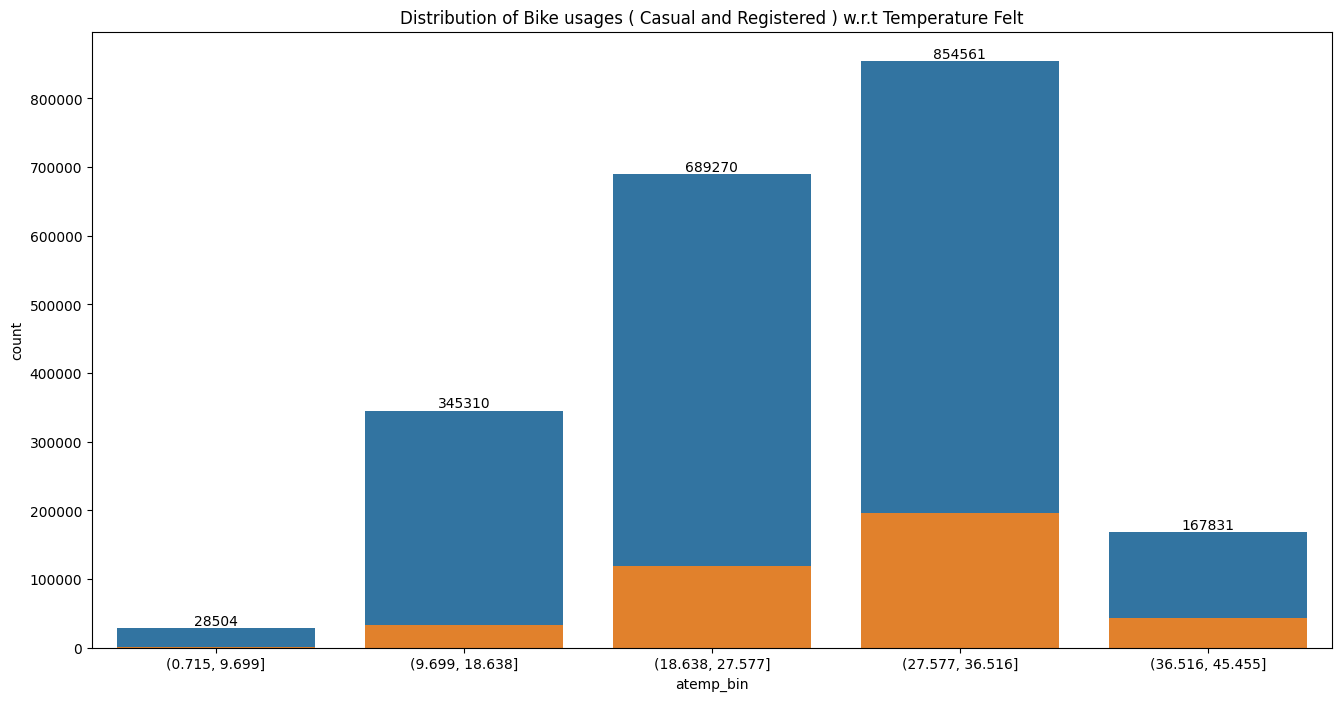

In [27]:
# Attempting to understand the distribution of bike usages w.r.t temperature felt
plt.figure(figsize=(16,8))
df['atemp_bin']=pd.cut(df['atemp'],bins=pts)
plt.title("Distribution of Bike usages ( Casual and Registered ) w.r.t Temperature Felt")
ax=sns.barplot(data=df.groupby(['atemp_bin'])[['count','casual','registered']].sum(),x='atemp_bin',y='count')
ax.bar_label(ax.containers[0])
sns.barplot(data=df.groupby(['atemp_bin'])[['count','casual','registered']].sum(),x='atemp_bin',y='casual')
plt.show()

Most Bike usages are seen in Felt Temperature range of 28 to 37 degree Celsius, followed by Temperature range of 17 to 28 degree Celsius.

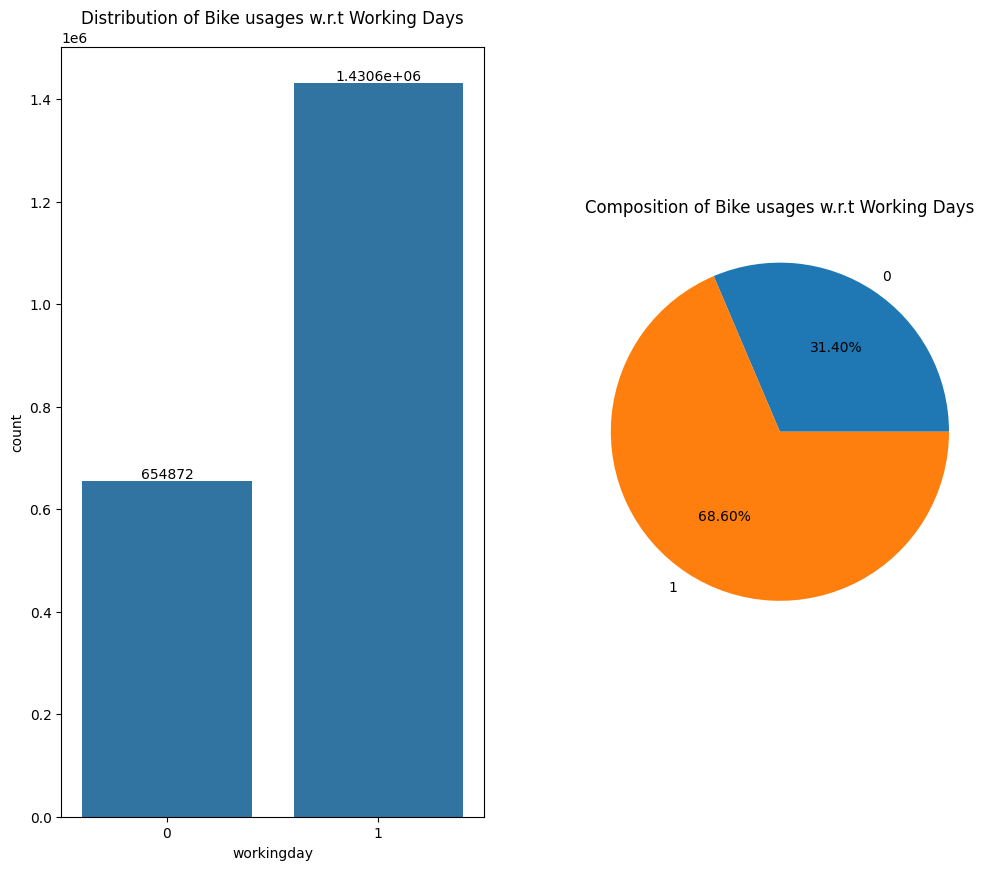

In [22]:
# Attempting to understand the distribution of bike usages w.r.t Working Days
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
dfwork=df.groupby('workingday')['count'].sum()
plt.title("Distribution of Bike usages w.r.t Working Days")
ax=sns.barplot(dfwork)
ax.bar_label(ax.containers[0])
plt.subplot(1,2,2)
plt.title("Composition of Bike usages w.r.t Working Days")
plt.pie(dfwork,labels=dfwork.index,autopct="%.2f%%")
plt.show()

68.6% of Bike usages are seen on the Working days and 31.4% of Bike usages are seen in the non Working Days.

**Hypothesis Testing**

Attempting to Answer the Business questions by setting up Hypothesis and testing it through various tools.

Q1. Working Day has effect on number of electric cycles rented

**Setting up Hypothesis:**

H0 : Working Day has no effect on the number of electric cycles rented.

H1 : Working Day does affect the number of electric cycles rented.

Significance level is set to 5%

In [ ]:
# Extracting the relevant data from the data set.
dfwn=df[df['workingday']==0]['count']
dfw=df[df['workingday']==1]['count']

<Axes: xlabel='count', ylabel='Count'>

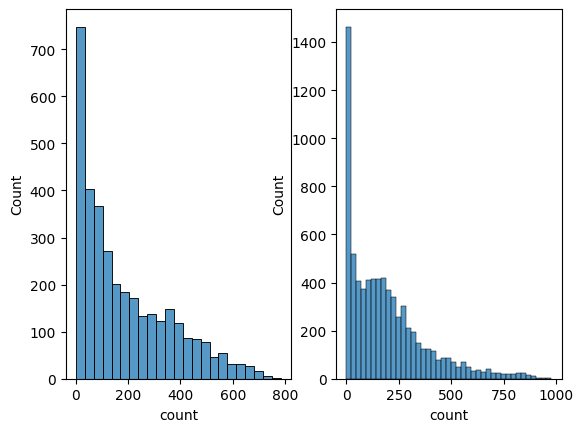

In [ ]:
# Visualizing the Datasets
plt.subplot(1,2,1)
sns.histplot(dfw)
plt.subplot(1,2,2)
sns.histplot(dfwn)

Undertaking Normality and Equal Variance Test to our Extracted Data

In [ ]:
print("p-value of Levene Test is ", round(levene(dfw,dfwn)[1],2))
print("p-value of Shapiro Test for dataset of working days is ", round(shapiro(dfw)[1],2))
print("p-value of Shapiro Test for dataset of non-working days is ", round(shapiro(dfwn)[1],2))

p-value of Levene Test is  0.94
p-value of Shapiro Test for dataset of working days is  0.0
p-value of Shapiro Test for dataset of non-working days is  0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since p-value of Levene Test is 0.94, the variances among our dataset is similar.

Since the p-value for both the Shapiro Test is near 0, we can conclude both data are not normally Distributed.

In [ ]:
# Undetaking 2 Sample T-Test on count of Bikes rented on Working Days data and Non-Working Days data
print("p-value of 2 Sample Test is ",ttest_ind(dfw,dfwn)[1])

p-value of 2 Sample Test is  0.22644804226361348


The p-value of our 2 Sample T-Test is above our significance level (0.23 > 0.05), Thus we fail to reject our Null Hypothesis.

**Hence we conclude that Working Day has no effect on the number of electric cycles rented.**

Q2. No. of cycles rented similar or different in different weather conditions

**Setting up Hypothesis:**

H0 : No. of cycles rented is similar in different weather

H1 : No. of cycles rented is different in different weather

Significance level is set to 5%

In [ ]:
# Extracting the relevant data from the data set.
dfw1=df[df['weather']==1]['count']
dfw2=df[df['weather']==2]['count']
dfw3=df[df['weather']==3]['count']
dfw4=df[df['weather']==4]['count']

<Axes: xlabel='count', ylabel='Count'>

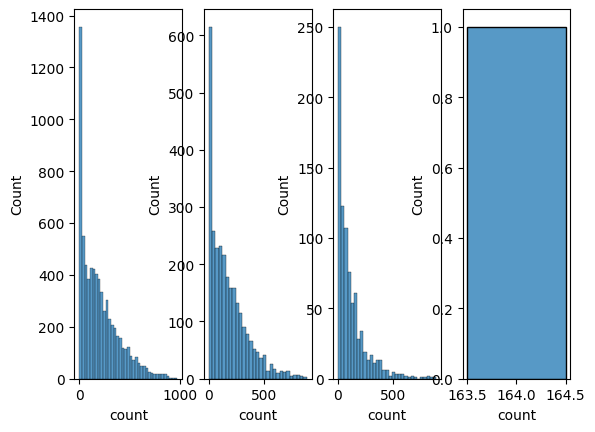

In [ ]:
# Visualizing the Datasets
plt.subplot(1,4,1)
sns.histplot(dfw1)
plt.subplot(1,4,2)
sns.histplot(dfw2)
plt.subplot(1,4,3)
sns.histplot(dfw3)
plt.subplot(1,4,4)
sns.histplot(dfw4)

Undertaking Normality and Equal Variance Test to our Extracted Data

In [ ]:
print("p-value of Levene Test is ", round(levene(dfw1,dfw2,dfw3,dfw4)[1],2))
print("p-value of Shapiro Test for dataset of weather 1 is ", round(shapiro(dfw1)[1],2))
print("p-value of Shapiro Test for dataset of weather 2 is ", round(shapiro(dfw2)[1],2))
print("p-value of Shapiro Test for dataset of weather 3 is ", round(shapiro(dfw3)[1],2))

p-value of Levene Test is  0.0
p-value of Shapiro Test for dataset of weather 1 is  0.0
p-value of Shapiro Test for dataset of weather 2 is  0.0
p-value of Shapiro Test for dataset of weather 3 is  0.0


Since p-value of Levene Test is near 0, the variances among our dataset is not similar.

Since the p-value for all the Shapiro Test is near 0, we can conclude all the data are not normally Distributed. (Couldn't undertake Shapiro Test for Weather 4 dataset due to lack of datapoints)

In [ ]:
# Undertaking One-Way Anova Test on count of Bikes rented on different Weather Conditions
print("p-value of One-Way Anova Test is ",f_oneway(dfw1,dfw2,dfw3,dfw4)[1])

p-value of One-Way Anova Test is  5.482069475935669e-42


The p-value of our One-Way Anova Test is below our Significance Level (5.5 x 10^-42 < 0.05), Thus we reject the Null Hypothesis and proved our Alternate Hypothesis.

**Hence we conclude that No. of cycles rented is different in different weather.**

Q3. No. of cycles rented similar or different in different seasons

**Setting up Hypothesis:**

H0 : No. of cycles rented is similar in different seasons

H1 : No. of cycles rented is different in different seasons

Significance level is set to 5%

In [ ]:
# Extracting the relevant data from the data set.
dfs1=df[df['season']==1]['count']
dfs2=df[df['season']==2]['count']
dfs3=df[df['season']==3]['count']
dfs4=df[df['season']==4]['count']

<Axes: xlabel='count', ylabel='Count'>

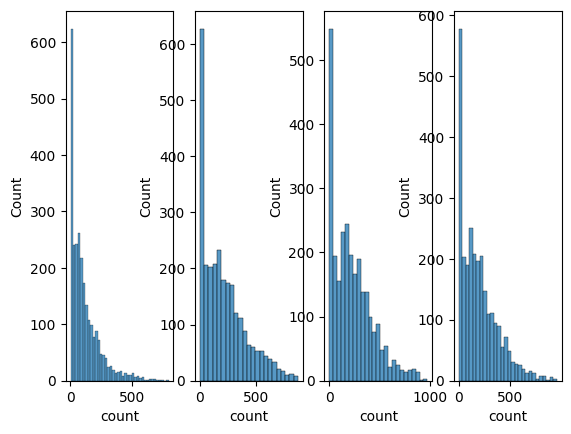

In [ ]:
# Visualizing the Datasets
plt.subplot(1,4,1)
sns.histplot(dfs1)
plt.subplot(1,4,2)
sns.histplot(dfs2)
plt.subplot(1,4,3)
sns.histplot(dfs3)
plt.subplot(1,4,4)
sns.histplot(dfs4)

Undertaking Normality and Equal Variance Test to our Extracted Data

In [ ]:
print("p-value of Levene Test is ", round(levene(dfs1,dfs2,dfs3,dfs4)[1],2))
print("p-value of Shapiro Test for dataset of season 1 is ", round(shapiro(dfs1)[1],2))
print("p-value of Shapiro Test for dataset of season 2 is ", round(shapiro(dfs2)[1],2))
print("p-value of Shapiro Test for dataset of season 3 is ", round(shapiro(dfs3)[1],2))
print("p-value of Shapiro Test for dataset of season 4 is ", round(shapiro(dfs4)[1],2))

p-value of Levene Test is  0.0
p-value of Shapiro Test for dataset of season 1 is  0.0
p-value of Shapiro Test for dataset of season 2 is  0.0
p-value of Shapiro Test for dataset of season 3 is  0.0
p-value of Shapiro Test for dataset of season 4 is  0.0


Since p-value of Levene Test is near 0, the variances among our dataset is not similar.

Since the p-value for all the Shapiro Test is near 0, we can conclude all the data are not normally Distributed.

In [ ]:
# Undertaking One-Way Anova Test on count of Bikes rented on different Seasons
print("p-value of One-Way Anova Test is ",f_oneway(dfs1,dfs2,dfs3,dfs4)[1])

p-value of One-Way Anova Test is  6.164843386499654e-149


The p-value of our One-Way Anova Test is below our Significance Level (6.2 x 10^-149 < 0.05), Thus we reject the Null Hypothesis and proved our Alternate Hypothesis.

**Hence we conclude that No. of cycles rented is different in different seasons.**

Q4. Weather is dependent on season.

**Setting up Hypothesis:**

H0 : Weather is not dependent on season

H1 : Weather is dependent on season

Significance level is set to 5%

In [ ]:
# Extracting the relevant data from the data set.
dct=pd.crosstab(df.season,df.weather)
dct

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
# Undertaking Chi Squared Test on the extracted Contingency Table
print("p-value of Chi Squared Test is ",chi2_contingency(dct)[1])

p-value of Chi Squared Test is  1.549925073686492e-07


The p-value of our Chi Squared Test is below our Significance Level (1.55 x 10^-07 < 0.05), Thus we reject the Null Hypothesis and proved our Alternate Hypothesis.

**Hence we conclude, Weather is dependent on season.**

**Recommendations and Actionable Insights**

From the undertaken Analysis, we can observe that least bike usage seen in January and most in June, Spring having least and Fall having most usage of bikes w.r.t seasons. Weather 1 ( Clear, Few clouds, partly cloudy, partly cloudy ) having most bike usages w.r.t weather. Most Bike usages seen in Humidity range of 40 to 60 and Temperature range of 25 to 33 degree celsius.
We had also concluded that the following:

1. Working Day has no effect on the number of electric cycles rented.

2. No. of cycles rented is different in different weather.

3. No. of cycles rented is different in different seasons.

4. Weather is dependent on season.

**Recommendations:**

1. Since the number of cycles rented varies through seasons, we can estimate the demand during each seasons and optimize the supply of Bikes available in the stations. Seasons with Peak Demands can also be targeted to promote or advertize the cycles heavily. Can also incentivize the rates of cycles in Seasons with less demand

2. Since the number of cycles rented varies through weather, we can use weather forecast data to estimate the cycle demand for upcoming days and act accordingly.

3. We can use the forecasted Humidity, Temperature and Windspeed data to predict and forecast the demand of the cycle and optimize the supply in city scale or regional scale.


